In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import random
import os
import math
import json
from scipy import misc
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

In [2]:
datasetPath = '../WinEarthPhotosByKeyword/'

In [3]:
#Constants
trueClass = 'Aurora'
falseClass = 'Day'
imageX = 64
imageY = 64
k = 2

In [4]:
tureImages = os.listdir(datasetPath + trueClass)
falseImages = os.listdir(datasetPath + falseClass)


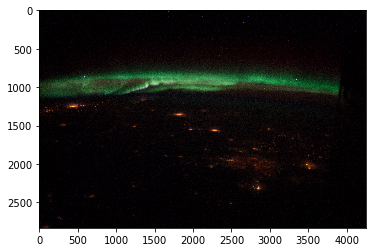

(2832, 4256, 3)
feature size: 36158976


In [5]:
img1 = mpimg.imread(datasetPath + trueClass +"/"+tureImages[0])
plt.imshow(img1)
plt.show()
print(img1.shape)
print('feature size: ' + str(img1.shape[0]*img1.shape[1] * img1.shape[2]))

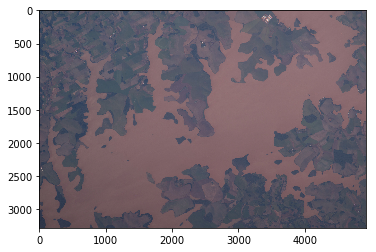

(3280, 4928, 3)
feature size: 48491520


In [6]:
img2 = mpimg.imread(datasetPath + falseClass +"/"+falseImages[0])
plt.imshow(img2)
plt.show()
print(img2.shape)
print('feature size: ' + str(img2.shape[0]*img2.shape[1] * img2.shape[2]))

In [7]:
def forceLandscape(image):
    if image.shape[0] > image.shape[1]:
        return np.rot90(image)
    return image

def resizeImage(image, x,y):
    return scipy.misc.imresize(image,(x,y), interp='nearest')

def grayscale(image):
    return np.dot(image[...,:3], [0.21, 0.72, 0.07])

def reshape(image):
    return image.flatten()

In [8]:
def formatImage(image):
    image = forceLandscape(image)
    image = resizeImage(image, imageX, imageY)
    image = grayscale(image)
    return image

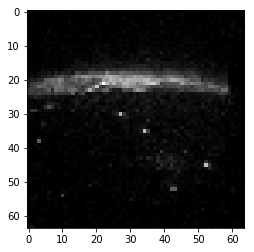

(64, 64)
feature size: 4096


In [9]:
formateImg1 = formatImage(img1)
plt.imshow(formateImg1, cmap='gray')
plt.show()
print(formateImg1.shape)
print('feature size: ' + str(formateImg1.shape[0]*formateImg1.shape[1]))

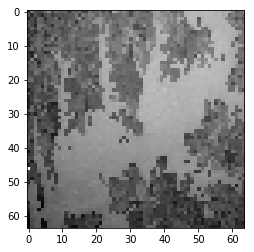

(64, 64)
feature size: 4096


In [10]:
formateImg2 = formatImage(img2)
plt.imshow(formateImg2, cmap='gray')
plt.show()
print(formateImg2.shape)
print('feature size: ' + str(formateImg2.shape[0]*formateImg2.shape[1]))

In [11]:
data = sum([tureImages, falseImages],[])
labels = sum([[trueClass] * len(tureImages),[falseClass] * len(falseImages)],[])

In [12]:
#loading should take long

for i in range(0, len(data)):
    imagePath = datasetPath + labels[i] + "/" +  data[i]
    img = mpimg.imread(imagePath)
    img = formatImage(img)
    img = reshape(img)
    data[i] = img
    
print("loading complete")

loading complete


In [13]:
knn = neighbors.KNeighborsClassifier(k, weights='distance')
scores = cross_val_score(knn, data, labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.97 (+/- 0.05)
[ 1.     0.925  1.     0.975  0.975]
